## 实施主要包含以下几个步骤:
- 载入特征向量
- 构建模型
- 训练模型
- 预测结果

## 步骤一：载入特征向量

In [1]:
import os
import shutil
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
from keras.callbacks import ModelCheckpoint, TensorBoard

import h5py
import numpy as np
from sklearn.utils import shuffle
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import seaborn as sns

Using TensorFlow backend.


In [2]:
np.random.seed(2018)

X_train = []
X_test = []

for filename in ["gap_ResNet50.h5", "gap_InceptionV3.h5","gap_VGG16.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)
print(len(X_test),len(X_train))

X_train, y_train = shuffle(X_train, y_train)

(12500, 25000)


## 步骤二：搭建模型

In [3]:
from keras.models import *
from keras.layers import *
from keras import optimizers

np.random.seed(4)

input_tensor = Input(X_train.shape[1:])

x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_tensor, outputs=x)
opt = optimizers.SGD(lr=0.01, momentum=0.8,decay=1e-4,nesterov=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## 步骤四：训练模型

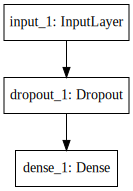

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
hist = model.fit(X_train, y_train, batch_size=128, nb_epoch=40, validation_split=0.2, callbacks=[TensorBoard(log_dir='union_tensorlog')])

/home/ubuntu/anaconda3/envs/dog/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 2s 115us/step - loss: 0.4343 - acc: 0.9531 - val_loss: 0.1078 - val_acc: 0.9844
Epoch 2/40
20000/20000 [==============================] - 2s 114us/step - loss: 0.1429 - acc: 0.9805 - val_loss: 0.0872 - val_acc: 0.9868
Epoch 3/40
20000/20000 [==============================] - 2s 119us/step - loss: 0.0987 - acc: 0.9846 - val_loss: 0.0791 - val_acc: 0.9872
Epoch 4/40
20000/20000 [==============================] - 2s 123us/step - loss: 0.0829 - acc: 0.9859 - val_loss: 0.0635 - val_acc: 0.9888
Epoch 5/40
20000/20000 [==============================] - 2s 101us/step - loss: 0.0719 - acc: 0.9873 - val_loss: 0.0588 - val_acc: 0.9908
Epoch 6/40
20000/20000 [==============================] - 2s 106us/step - loss: 0.0685 - acc: 0.9879 - val_loss: 0.0659 - val_acc: 0.9890
Epoch 7/40
20000/20000 [==============================] - 2s 118us/step - loss: 0.0607 - acc: 0.9883 - val_loss: 0.0562 - v

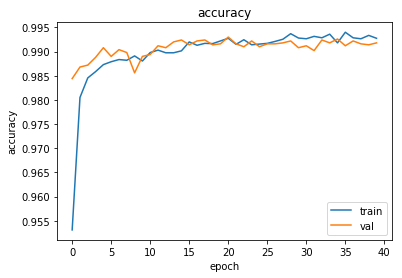

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  plt.plot(acc)
  plt.plot(val_acc)
  
  plt.title('accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc= 'lower right')
  plt.show()
plot_training(hist)

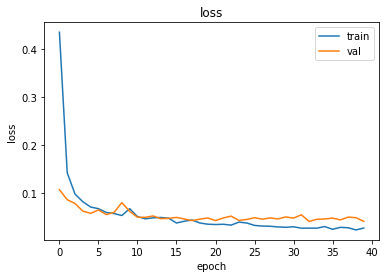

In [9]:
def plot_training2(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.plot(loss)
  plt.plot(val_loss)
  
  plt.title('loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc= 'upper right')
  plt.show()
plot_training2(hist)

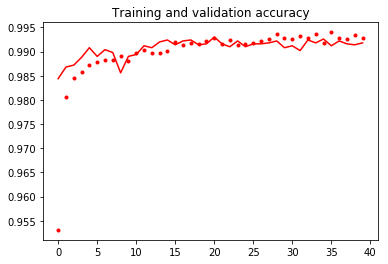

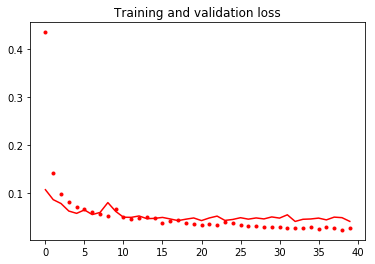

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# 画图
def plot_training3(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()


# 训练的acc_loss图
plot_training3(hist)

## 预测结果

In [11]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

12500/12500 [==============================] - 0s 27us/step


In [12]:
print(y_pred[:5].reshape(1,5))

[[ 0.995  0.005  0.005  0.995  0.995]]


In [16]:
import pandas  as pd
df = pd.read_csv("sample_submission.csv")

In [17]:
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("image/test2", (224, 224), shuffle=False, 
                                         batch_size=64, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('submission_union.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


/home/ubuntu/anaconda3/envs/dog/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


id  label
0   1  0.995
1   2  0.995
2   3  0.995
3   4  0.995
4   5  0.005
5   6  0.005
6   7  0.005
7   8  0.005
8   9  0.005
9  10  0.005

In [18]:
window_l = list(np.where(y_pred > 0.4)[0])
window_r = list(np.where(y_pred < 0.6)[0])
cannot_pred = list(set(window_l).intersection(set(window_r)))

In [19]:
print(len(cannot_pred))
print(cannot_pred)

14
[7493, 10277, 10566, 5321, 7882, 9067, 3212, 5583, 1425, 469, 5909, 5367, 509, 2334]


In [20]:
def showimg(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

image/test/5492.jpg


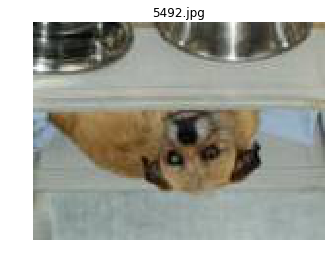

image/test/7999.jpg


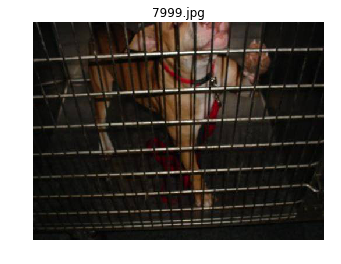

image/test/8258.jpg


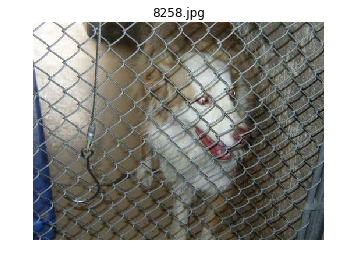

image/test/3537.jpg


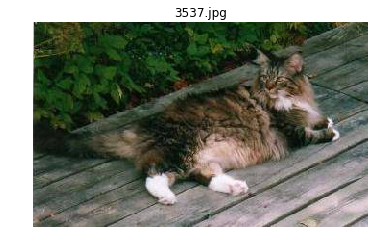

image/test/5842.jpg


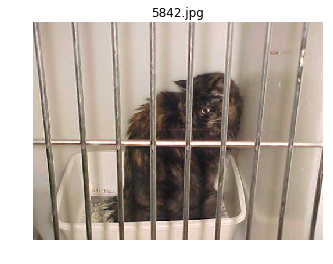

image/test/6909.jpg


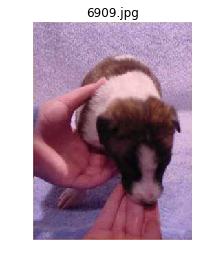

image/test/1639.jpg


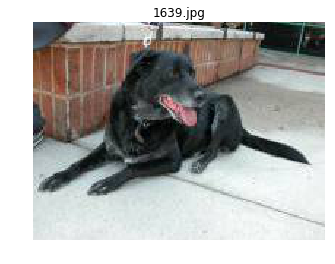

image/test/3773.jpg


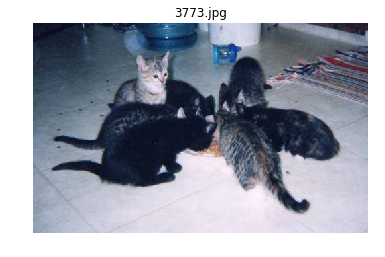

image/test/11280.jpg


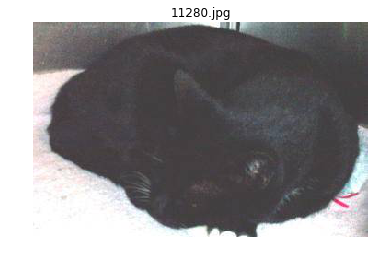

image/test/1042.jpg


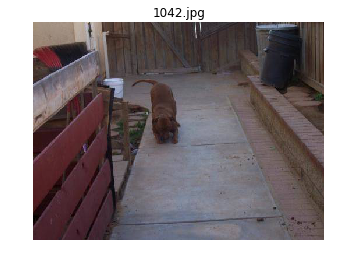

image/test/4066.jpg


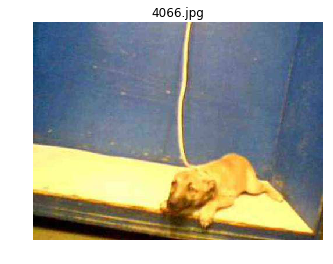

image/test/3579.jpg


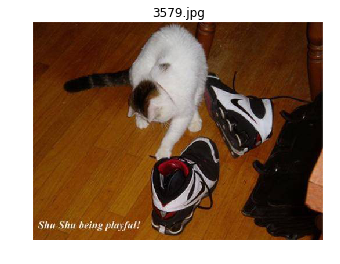

image/test/10456.jpg


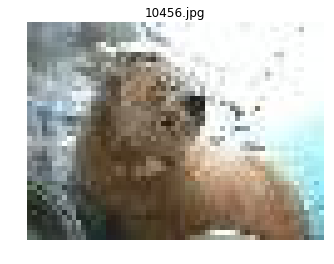

image/test/12099.jpg


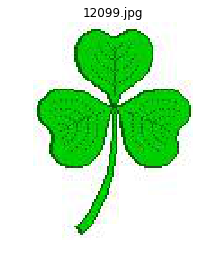

In [38]:
import cv2
from shutil import copyfile
nb = 0
for i in cannot_pred:
    file = test_generator.filenames[i]
    file_name = file[file.find('/') + 1:]
    file = 'image/' + file
    print(file)
    img = cv2.imread(file)[:,:,::-1]
    showimg(img, file_name)
    copyfile(file, 'image/image_errors/' + file_name)